In [78]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

#Load file
dataframe = pd.read_csv("data.csv", delimiter=";")

print(f"We got {len(dataframe)} rows and {len(dataframe.columns)} columns")

We got 181 rows and 52 columns


In [79]:
#Extract Data
features = dataframe.iloc[:, [2,4,6,8,10,12,14,16,18,20,21,24,26,28,30,32,33,35,36,37,38,41,42]]
target = dataframe.iloc[:, [43]]

features.loc[features['CRP    '].str.startswith('<'),'CRP    ']=0
#Treat string data as NaN
pd.options.mode.chained_assignment = None

for col in features:
    features[col]=pd.to_numeric(features[col], errors='coerce') 

#Replace NaN by mean value
imp = SimpleImputer(missing_values=pd.NA, strategy='median')
features=pd.DataFrame(imp.fit_transform(features), columns=features.columns)
features

,GB (p/µL),GR (p/µL),Cellule épithéliales (p/µL),Cellules non-épithéliales (p/µL),Levures (p/µL),Bactéries (p/ µL),Cylindres hyalins (p/µL),Cylindres pathologiques (p/µL),Cristaux (p/µL),ERY 560,...,KET,GLU réfl,"Glucose ur, chaines",PRO réfl,"Protéines ur, chaines (mg/L)",PH 560,PH 615,PH,SG,CRP
0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,64.41,...,51.85,70.12,2.00,64.38,485.0,33.87,68.07,6.0,1.012,0.00
1,900.00,15.84,2.20,0.00,0.00,40.04,0.0,0.00,0.00,19.18,...,54.41,69.66,5.00,60.91,93.0,34.13,67.59,6.0,1.022,22.07
2,629.64,429.44,3.08,9.68,0.00,41.36,0.0,0.00,0.00,12.65,...,52.29,72.14,0.00,57.17,120.0,13.72,9.31,9.0,1.015,40.85
3,0.00,4.40,1.76,0.00,0.00,47.96,0.0,0.00,0.00,65.76,...,55.07,72.65,1.00,65.90,21.0,35.38,33.27,7.0,1.004,1.18
4,91.74,7.04,7.92,1.76,0.44,64.24,0.0,0.00,0.00,54.43,...,48.03,68.66,9.00,59.06,185.0,34.14,68.37,6.0,1.022,22.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,900.00,1800.00,0.00,0.00,0.00,2904.00,0.0,14.70,0.00,10.01,...,51.95,67.17,3.00,50.65,318.0,37.49,63.65,6.0,1.019,18.92
177,91.38,1663.20,0.00,0.51,1.02,434.58,0.0,14.72,21.32,14.37,...,51.97,71.11,5.57,54.92,663.0,29.21,68.01,5.0,1.016,118.00
178,495.00,452.60,18.90,0.00,0.00,3997.70,0.0,18.90,0.00,15.57,...,54.51,68.75,3.00,41.22,670.0,38.54,37.18,7.0,1.018,16.99
179,257.40,1047.20,0.00,0.00,0.00,1839.20,0.0,26.40,1025.20,10.20,...,47.05,68.93,5.00,58.73,230.0,16.96,12.04,8.0,1.013,125.77


In [80]:
#Problem space has >10 dimensions, we fall into https://en.wikipedia.org/wiki/Curse_of_dimensionality. 
#Let's find the most relevant dimension using PCA

#We first need to normalize the data
scaledFeatures = pd.DataFrame(preprocessing.scale(features),columns = features.columns)

pca = PCA()

principalComponents = pca.fit_transform(scaledFeatures)

print (f"percentage of precision with the number of components :\n {pca.explained_variance_ratio_.cumsum()}")

#relationship from data to component
#print(pd.DataFrame(pca.components_,columns=x.columns))
principalDf = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([principalDf, target], axis = 1)

percentage of precision with the number of components :
 [0.17145592 0.29373857 0.39322328 0.47299384 0.54169599 0.59995475
 0.65057075 0.69751735 0.73894822 0.7782401  0.81124348 0.84206277
 0.87205105 0.89846019 0.92317153 0.94307601 0.95906451 0.97254596
 0.98403929 0.99335131 0.99731145 0.9989689  1.        ]


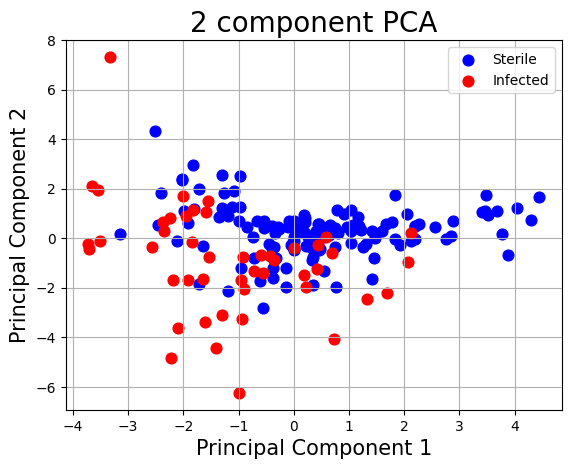

In [81]:
#plot the first 2 principals components
fig = plt.figure()
ax = fig.add_subplot() 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

cond = finalDf.iloc[:,-1:] == 0
cond = cond.squeeze()
subset_a = finalDf[cond.squeeze()]
subset_b = finalDf[~cond]
plt.scatter(subset_a.iloc[:,1], subset_a.iloc[:,2], s=60, c='b', label='Sterile')
plt.scatter(subset_b.iloc[:,1], subset_b.iloc[:,2], s=60, c='r', label='Infected') 
ax.legend()
ax.grid()

In [82]:
#Lets try to classify anyway, using https://medium.com/thrive-in-ai/classification-algorithms-in-python-5f58a7a27b88

from sklearn.model_selection import train_test_split

In [83]:
#Using Linear Regression
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train,Y_test = train_test_split(features, target, test_size=0.2)
lr_clf = LogisticRegression().fit(preprocessing.scale(X_train),Y_train.values.ravel())
lr_clf.score(preprocessing.scale(X_test),Y_test)

0.8918918918918919

In [84]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = RandomForestClassifier().fit(preprocessing.scale(X_train),Y_train.values.ravel())
lr_clf.score(preprocessing.scale(X_test),Y_test)

0.7567567567567568

In [85]:
#Using naive_bayes
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = GaussianNB().fit(preprocessing.scale(X_train),Y_train.values.ravel())
lr_clf.score(preprocessing.scale(X_test),Y_test)

0.7837837837837838

In [86]:
#Using Nearest Neighbours Classification
from sklearn import neighbors
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = neighbors.KNeighborsClassifier().fit(preprocessing.scale(X_train),Y_train.values.ravel())
lr_clf.score(preprocessing.scale(X_test),Y_test)

0.8108108108108109

In [87]:
#using SVM Classifier
from sklearn import svm
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = svm.SVC(kernel = 'linear').fit(preprocessing.scale(X_train),Y_train.values.ravel())
lr_clf.score(preprocessing.scale(X_test),Y_test)

0.8648648648648649

In [88]:
#using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = GradientBoostingClassifier().fit(preprocessing.scale(X_train),Y_train.values.ravel())
lr_clf.score(preprocessing.scale(X_test),Y_test)

0.8378378378378378

[Text(0.5, 0.95, 'x[0] <= -0.222\ngini = 0.401\nsamples = 144\nvalue = [104, 40]'),
 Text(0.3333333333333333, 0.85, 'x[15] <= -0.281\ngini = 0.221\nsamples = 103\nvalue = [90, 13]'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4166666666666667, 0.75, 'x[5] <= 0.972\ngini = 0.15\nsamples = 98\nvalue = [90, 8]'),
 Text(0.3333333333333333, 0.65, 'x[14] <= 0.504\ngini = 0.117\nsamples = 96\nvalue = [90, 6]'),
 Text(0.16666666666666666, 0.55, 'x[16] <= -2.41\ngini = 0.064\nsamples = 90\nvalue = [87, 3]'),
 Text(0.08333333333333333, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.45, 'x[2] <= -0.013\ngini = 0.044\nsamples = 89\nvalue = [87, 2]'),
 Text(0.16666666666666666, 0.35, 'gini = 0.0\nsamples = 67\nvalue = [67, 0]'),
 Text(0.3333333333333333, 0.35, 'x[12] <= 0.006\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4166666666666667, 0.25, 'x[8] <= -0.074\ngini = 0.091\nsamples =

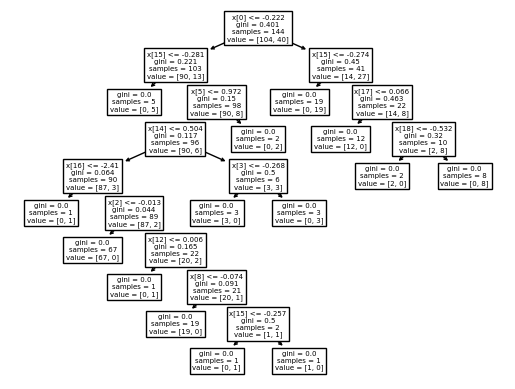

In [89]:
from sklearn import tree
X_train, X_test, Y_train,Y_test = train_test_split(scaledFeatures, target, test_size=0.2)
lr_clf = tree.DecisionTreeClassifier().fit(preprocessing.scale(X_train),Y_train.values.ravel())
lr_clf.score(preprocessing.scale(X_test),Y_test)
tree.plot_tree(lr_clf)